# Map crime in San Francisco

The dataset is from Kaggle San Francisco crime, with dates, DayofWeek, category, district, resolution, address, lon/lat. For this project, I focus on lon/lat and category

In [3]:
library(ggplot2)
library(ggmap)
library(sp)
library(maptools)
library(rgdal)
library(rgeos)
library(RColorBrewer)
library(dplyr)
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
crime = read.csv('train.csv')
str(crime)

'data.frame':	878049 obs. of  9 variables:
 $ Dates     : Factor w/ 389257 levels "2003-01-06 00:01:00",..: 389257 389257 389256 389255 389255 389255 389255 389255 389254 389254 ...
 $ Category  : Factor w/ 39 levels "ARSON","ASSAULT",..: 38 22 22 17 17 17 37 37 17 17 ...
 $ Descript  : Factor w/ 879 levels "ABANDONMENT OF CHILD",..: 867 811 811 405 405 407 740 740 405 405 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 5 5 5 5 6 3 3 1 7 2 ...
 $ Resolution: Factor w/ 17 levels "ARREST, BOOKED",..: 1 1 1 12 12 12 12 12 12 12 ...
 $ Address   : Factor w/ 23228 levels "0 Block of  HARRISON ST",..: 19791 19791 22698 4267 1844 1506 13323 18055 11385 17659 ...
 $ X         : num  -122 -122 -122 -122 -122 ...
 $ Y         : num  37.8 37.8 37.8 37.8 37.8 ...


In [4]:
summary(crime$Category)

ARSON                     ASSAULT 
                       1513                       76876 
                 BAD CHECKS                     BRIBERY 
                        406                         289 
                   BURGLARY          DISORDERLY CONDUCT 
                      36755                        4320 
DRIVING UNDER THE INFLUENCE               DRUG/NARCOTIC 
                       2268                       53971 
                DRUNKENNESS                EMBEZZLEMENT 
                       4280                        1166 
                  EXTORTION             FAMILY OFFENSES 
                        256                         491 
     FORGERY/COUNTERFEITING                       FRAUD 
                      10609                       16679 
                   GAMBLING                  KIDNAPPING 
                        146                        2341 
              LARCENY/THEFT                 LIQUOR LAWS 
                     174900                        1903 
                  LOITERING              MISSING PERSON 
                       1225                       25989 
               NON-CRIMINAL              OTHER OFFENSES 
                      92304                      126182 
    PORNOGRAPHY/OBSCENE MAT                PROSTITUTION 
                         22                        7484 
          RECOVERED VEHICLE                     ROBBERY 
                       3138                       23000 
                    RUNAWAY             SECONDARY CODES 
                       1946                        9985 
      SEX OFFENSES FORCIBLE   SEX OFFENSES NON FORCIBLE 
                       4388                         148 
            STOLEN PROPERTY                     SUICIDE 
                       4540                         508 
             SUSPICIOUS OCC                        TREA 
                      31414                           6 
                   TRESPASS                   VANDALISM 
                       7326                       44725 
              VEHICLE THEFT                    WARRANTS 
                      53781                       42214 
                WEAPON LAWS 
                       8555

In [5]:
#remove those with Y=90.0
crime = crime[crime$Y!=90.0,]

# Use ggmap to plot crime locations

The package ggmap in R makes mapping much easier. The function get_map() can get map data from google map, openstreetmap, at specificied locations and zoom level, and style. Then use ggplot() to add layers of data on top of the map.

In [7]:
locations = c(left = -122.5222, 
                bottom = 37.7073, 
                right = -122.3481,
                top = 37.8381)
map_data = get_map(location=locations, zoom=12, source='osm',color='bw')

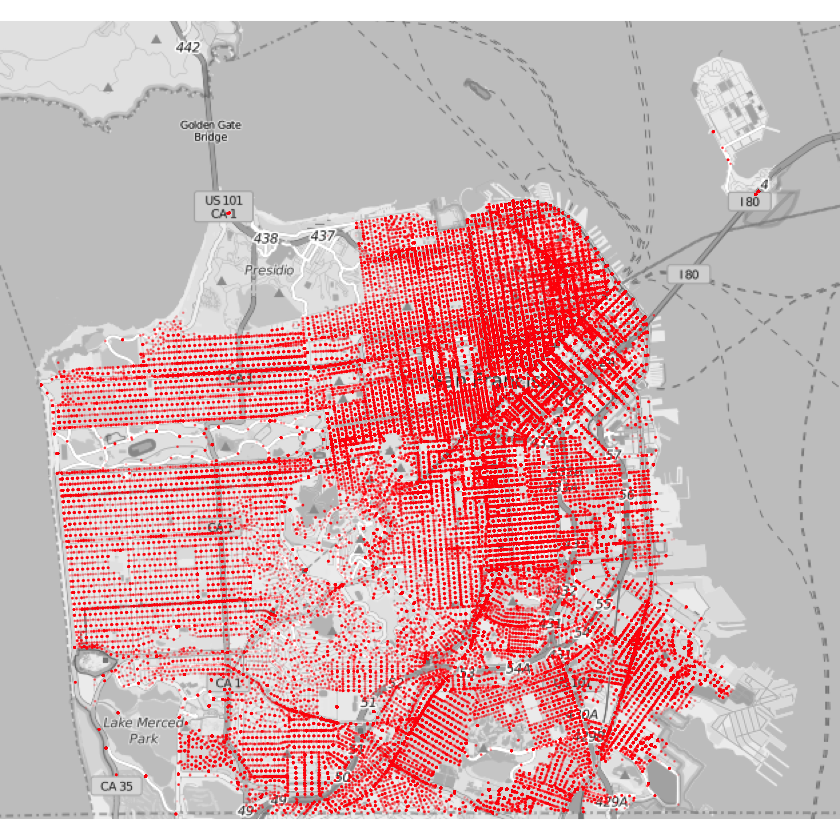

In [8]:
ggmap(map_data,extent='device') + 
geom_point(aes(x=X,y=Y),data=crime,alpha=0.1,color='red',size=0.1)

# Map selected categories of crime

The aggregate plot of all crimes is not very informative. The function 'map_crime' can plot selected category or categories of crime, to make it easier to visualize the locations of a particular type of crime.

In [17]:
map_crime = function(df, categories){
	filtered = filter(df, Category %in% categories)
	plot = ggmap(map_data, extent='device') + geom_point(data=filtered, aes(x=X,y=Y,color=Category),alpha=0.1,size=0.1)
	return(plot)
}

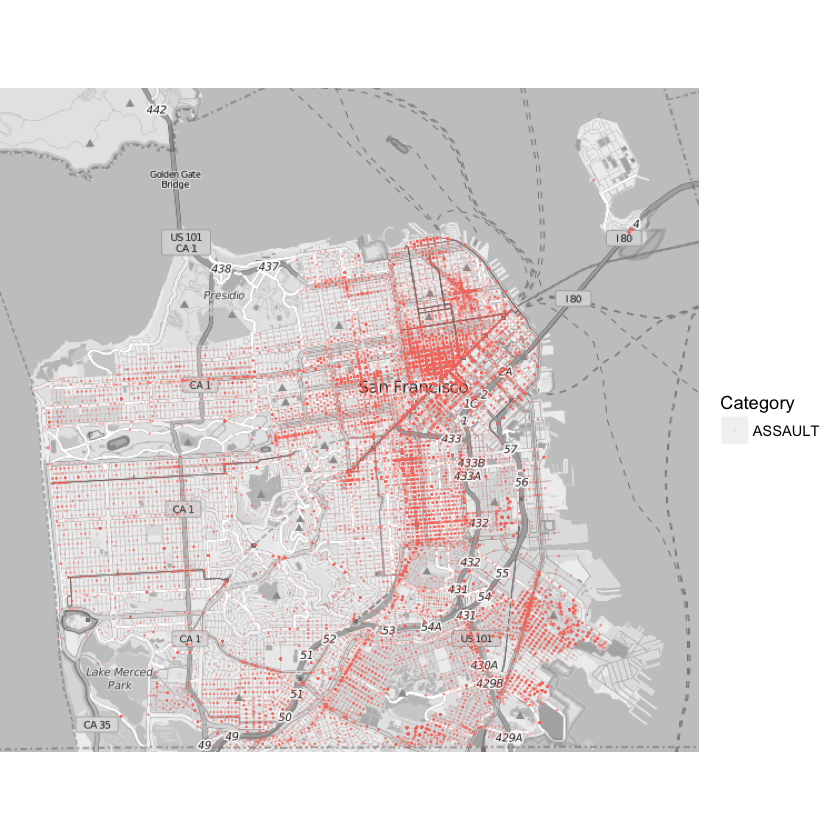

In [18]:
map_crime(crime, 'ASSAULT')

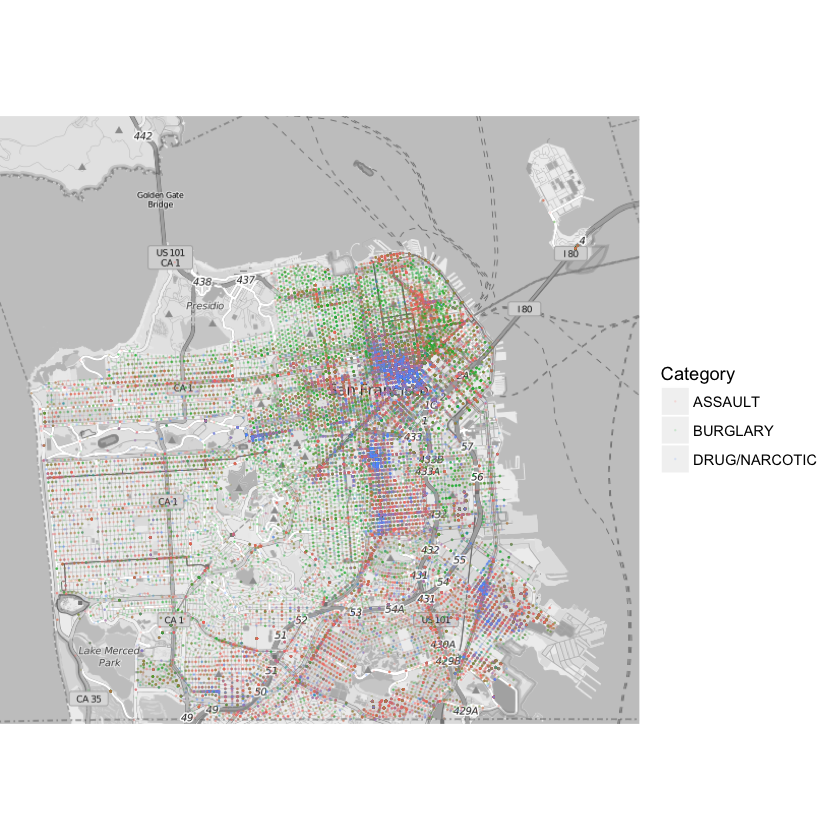

In [19]:
map_crime(crime, c('ASSAULT','DRUG/NARCOTIC','BURGLARY'))

# Plot density of crime

With density plot, it is clear that tenderloin is the hotspot for crime. Compare the three categories, assault, burglary, and drug/narcotic, assault and burglary are more spread out whereas drug/narcotic is very concentrated in the tenderloin district.

In [20]:
crime_subset = filter(crime, Category %in% c('ASSAULT','DRUG/NARCOTIC','BURGLARY'))
dim(crime_subset)

[1] 167597      9

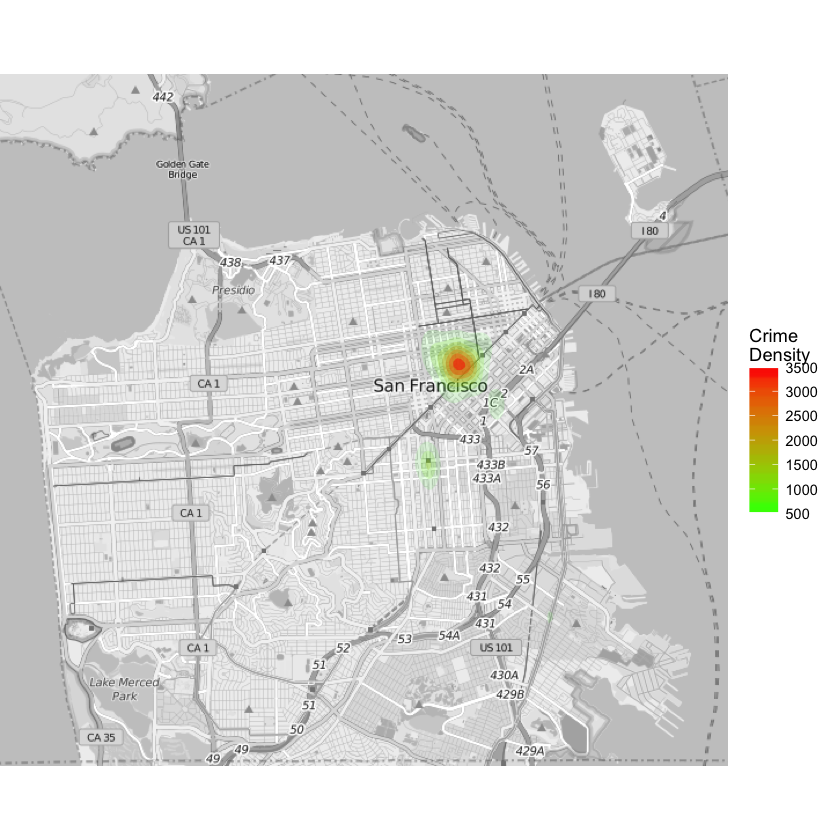

In [21]:
contours <- stat_density2d(
aes(x = X, y = Y, fill = ..level.., alpha=..level..),
size = 0.1, data = crime_subset, n=200,
geom = "polygon")

ggmap(map_data, extent='device') + contours +
scale_alpha_continuous(range=c(0.1,0.5), guide='none') +
scale_fill_gradient('Crime\nDensity',low="green",high="red")

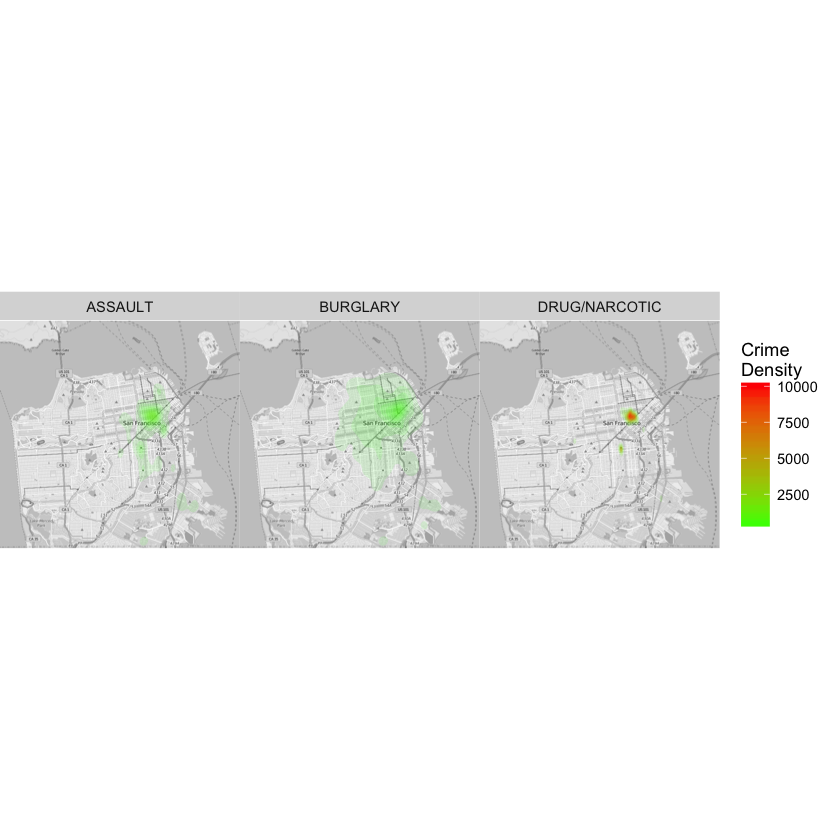

In [22]:
ggmap(map_data, extent='device') + contours +
scale_alpha_continuous(range=c(0.1,0.5), guide='none') +
scale_fill_gradient('Crime\nDensity',low="green",high="red") +
facet_wrap(~Category)